# Exercise 4. Exploratory Data Analysis (EDA)

## Task 1. Loading the dataset.
Load the dataset `2009_SCIENCE_GARDEN.csv` using the relative path provided. Display the first few rows of the data to understand its structure, and check for any missing values.

In [2]:
import pandas as pd

# Load the dataset using the relative path
data_path = '../lessons/03_statistics/data/2009_SCIENCE_GARDEN.csv'
df = pd.read_csv(data_path)

# Display first few rows
df.head()

# Display basic info
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            365 non-null    object 
 1   DAILY RAINFALL  359 non-null    float64
 2   TEMP MEAN       365 non-null    float64
 3   TEMP MAX        365 non-null    float64
 4   TEMP MIN        365 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB


DATE              0
DAILY RAINFALL    6
TEMP MEAN         0
TEMP MAX          0
TEMP MIN          0
dtype: int64

#### Questions
1. Are there missing values in the dataset? Which columns contain these missing values?
2. Based on the first few rows, what variables are available in this dataset, and what types of data do they contain?

## Answer:
1. It seems that there are some null count for the column Daily Rainfall as the total entries should be 365, while the Daily Rainfall only contains 359, 6 units less basically.
2. There are about 5 variables namely: Date, Daily Rainfall, Temp Mean, Temp Max, Temp Min. The Date is an Object Data type while the rest are float.

---
## Task 2: Summary Statistics
Calculate and interpret the summary statistics (mean, median, min, max, standard deviation) for each numeric column in the dataset

In [3]:
# Summary statistics
summary_stats = df.describe()
summary_stats

# Calculate specific statistics for the "Daily Rainfall" column
rainfall_mean = df['DAILY RAINFALL'].mean()
rainfall_median = df['DAILY RAINFALL'].median()
rainfall_min = df['DAILY RAINFALL'].min()
rainfall_max = df['DAILY RAINFALL'].max()
rainfall_std = df['DAILY RAINFALL'].std()

print(f"Mean Rainfall: {rainfall_mean:.2f}")
print(f"Median Rainfall: {rainfall_median:.2f}")
print(f"Min Rainfall: {rainfall_min:.2f}")
print(f"Max Rainfall: {rainfall_max:.2f}")
print(f"std Rainfall: {rainfall_std:.2f}")

mean_temp_mean = df['TEMP MEAN'].mean()
mean_temp_median = df['TEMP MEAN'].median()
mean_temp_min = df['TEMP MEAN'].min()
mean_temp_max = df['TEMP MEAN'].max()
mean_temp_std = df['TEMP MEAN'].std()

print(f"Mean of Mean Temperature: {mean_temp_mean:.2f}")
print(f"Median Mean Temperature: {mean_temp_median:.2f}")
print(f"Min Mean Temperature: {mean_temp_min:.2f}")
print(f"Max Mean Temperature: {mean_temp_max:.2f}")
print(f"std Mean Temperature: {mean_temp_std:.2f}")

Mean Rainfall: 11.30
Median Rainfall: 0.25
Min Rainfall: 0.00
Max Rainfall: 454.91
std Rainfall: 35.61
Mean of Mean Temperature: 27.04
Median Mean Temperature: 27.22
Min Mean Temperature: 22.28
Max Mean Temperature: 30.78
std Mean Temperature: 1.52


### Questions:

1. What are the mean and median values for Daily Rainfall? Mean Temperature? Max Temperature? Minimum Temperature?
2. How does the mean compare to the median for each variable? What might this indicate about the data's distribution?
3. What is the maximum daily rainfall? How might this represent extreme weather events?

## Answer:
1. The following are: Mean Daily Rainfall: 11.30, Median Daily Rainfall: 0.25, Mean of Min Temperature: 23.41, Median Min Temperature: 23.89, Mean of Max Temperature: 31.66, Median Max Temperature: 31.89
2. For the Daily Rainfall, there seems to be a large gap. For the rest of the values, it seems to be 
3. The max rainfall is shown to be 454.91. This signifies an extreme weather events as the mean rainfall is only 11.30, basically the normal rainfall amount is only around 11 while the max is 454, drastically larger than the normal rainfall amount received.

---
## Task 3: Histogram for Rainfall Distribution
Create a histogram for `Daily Rainfall` to visualize its distribution. Look for any skewness or extreme values in the rainfall data.

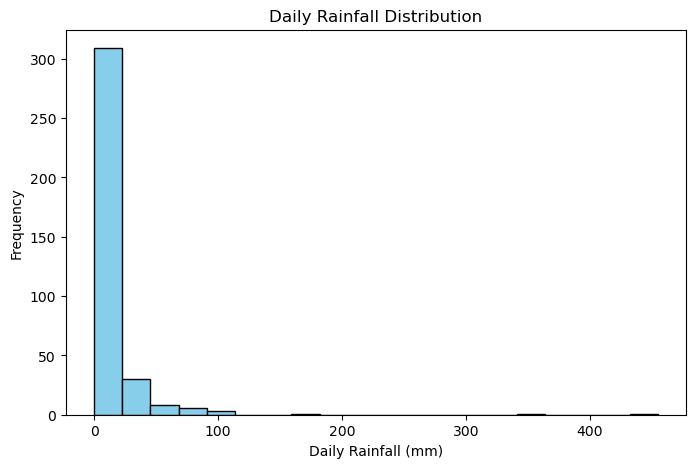

In [4]:
import matplotlib.pyplot as plt

# Histogram for Daily Rainfall
plt.figure(figsize=(8, 5))
plt.hist(df['DAILY RAINFALL'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


### Questions

1. Describe the shape of the Daily Rainfall distribution. Is it symmetric, positively skewed, or negatively skewed?
2. How might the shape of the histogram reflect the frequency of rainy versus dry days?

## Answer:
1. A positive skew is defined as the graph leaning or largely found at the left, at the lower ranges. A negative skew is the opposite, leaning mostly on the right side. The graph above is considered a positive skew as the largest data is on the left. This is because the number of non-rainy days contributing higher values, shifting the histogram’s tail to the right.
2. It is shown that there are some points where rainfall amount reaches more than 400mm, 350mm, and less than 200mm, with most rainfall not reaching 100mm. It can be seen that the value with 0mm has a frequency of more than 300 days, meaning that the dry days overshadow the number of rainy days, with occasional extreme values during rainy events.

---
## Task 4. Analyze Rainy Days Only
Drop the days with zero rainfall and create a new histogram for `Daily Rainfall`. Compare this histogram to the one in Task 3 to see how excluding zero-rain days changes the distribution.


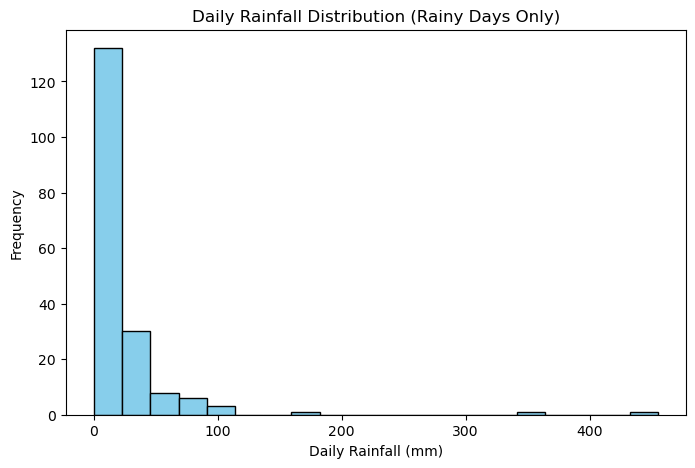

In [5]:
# Create a new DataFrame that only includes days with rainfall
rainy_days_df = df[df['DAILY RAINFALL'] > 0]

# Plot histogram for Daily Rainfall (rainy days only)
plt.figure(figsize=(8, 5))
plt.hist(rainy_days_df['DAILY RAINFALL'], bins=20, color='skyblue', edgecolor='black')
plt.title('Daily Rainfall Distribution (Rainy Days Only)')
plt.xlabel('Daily Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()


### Questions
1. How does this histogram differ from the previous histogram that included all days?
2. How does excluding zero-rain days affect the mean and median of daily rainfall? HINT: compare `rainy_days_df['DAILY RAINFALL'].mean()` and `df['DAILY RAINFALL'].mean()`. Use additional cells if needed.
3. In what scenarios might it be useful to exclude zero-rain days versus include them?

In [6]:
mean_rainy = rainy_days_df['DAILY RAINFALL'].mean()
mean_zero_rain = df['DAILY RAINFALL'].mean()
median_rainy = rainy_days_df['DAILY RAINFALL'].median()
median_zero_rain = df['DAILY RAINFALL'].median()

print('Mean of rainy days =', mean_rainy)
print('Mean of zero_rain =', mean_zero_rain)
print('Median of rainy days =', median_rainy)
print('Median of zero_rain =', median_zero_rain)

Mean of rainy days = 22.298967032967035
Mean of zero_rain = 11.304768802228411
Median of rainy days = 7.4929999999999986
Median of zero_rain = 0.254


## Answer:
1. This graph only shows maximum days of over 120. As compared to the previous graph of 300. By excluding non-rainy days, the histogram will shift to the left, as it will focus solely on days with rainfall. This creates a distribution centered around actual rainfall values.
2. with "rainy" for describing only rainy days and zero_rain for including days without rain, we can see that the mean and median for rainy is significantly larger than zero_rain. This is because we are also including data points with a value = 0, therefore lowering the overall mean and median for including days with 0 rainfall. Basically, including zeros reduces the central tendency values, as zero values pull the mean and median down.
3. Excluding non-rainy days is helpful when analyzing rainy day patterns such as determining typical rainfall amounts during rainy days. Including non-rainy days is useful for overall precipitation statistics over time, including dry spell frequency.

---
## Task 5: Cumulative Rainfall Over Time
Calculate the cumulative rainfall over time to observe how rainfall accumulates. Plot the cumulative rainfall to identify any trends or periods with significant rainfall.

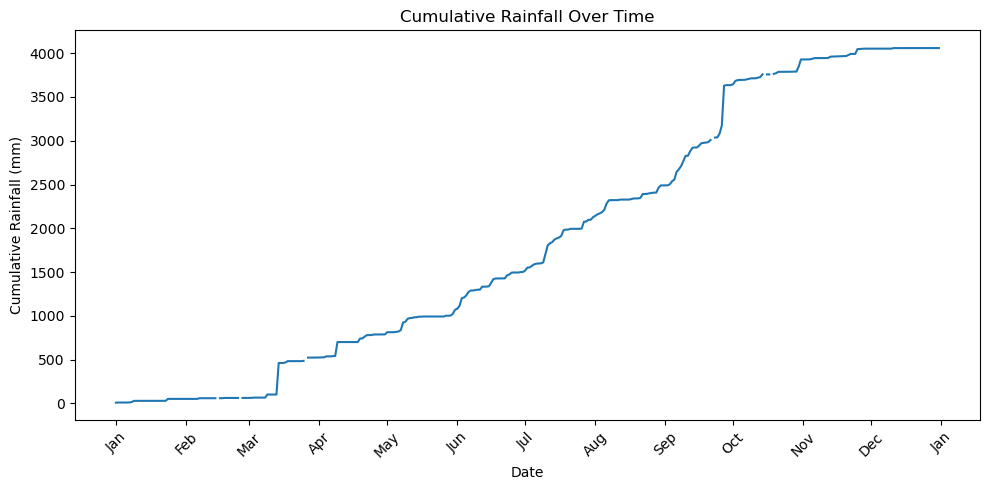

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Calculate cumulative rainfall
df['Cumulative Rainfall'] = df['DAILY RAINFALL'].cumsum()

# Plot cumulative rainfall over time with monthly x-axis ticks
plt.figure(figsize=(10, 5))
plt.plot(df['DATE'], df['Cumulative Rainfall'], color='tab:blue')
plt.title('Cumulative Rainfall Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Rainfall (mm)')

# Set x-axis to display months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format as 'Month Year'

plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

### Questions

1. Describe the trend of cumulative rainfall over time. Are there any periods with rapid accumulation?
2. What could be some causes for sudden increases in cumulative rainfall?

## Answer:
1. It can be seen that there is a drastic increase in rainfall amount between March and April, with various minute increases at points of around April, start of May and June, early July, with a steep but gradual increase around September, and most notably around start of October.
2. I deduce that short-term weather phenomena like tropical cyclones could potentially induce heavy rainfall events, contributing to the short and sudden increases in rainfall amount.

---
## Task 6. Handling Outliers in Daily Rainfall
The `Daily Rainfall` data contains several extreme outliers and many zero-rain days. For this part of the exercise:

- First, filter the data to exclude zero-rain days.
- Then, filter out rainfall values above the 95th percentile to remove extreme outliers.
- Plot a new boxplot for the filtered data.
- Compare the summary statistics (mean and median) for:
    - All days (including zero-rain and outliers)
    - Rainy days only (excluding zero-rain)
    - Filtered rainy days (excluding zero-rain and the top 5% of rainfall values)

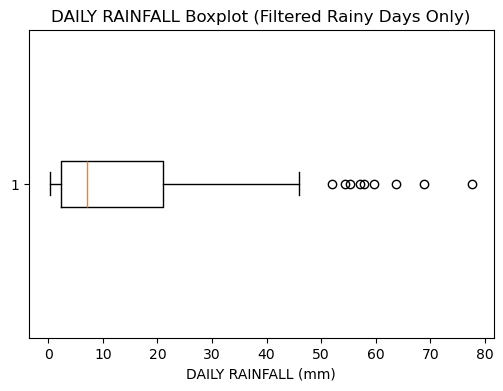

Summary Statistics:
Original Mean (All Days): 11.30 mm
Original Median (All Days): 0.25 mm

Mean (Rainy Days Only): 22.30 mm
Median (Rainy Days Only): 7.49 mm

Filtered Mean (Filtered Rainy Days Only): 14.26 mm
Filtered Median (Filtered Rainy Days Only): 7.11 mm


In [32]:
# Calculate the 95th percentile for DAILY RAINFALL (non-zero only)
threshold = df[df['DAILY RAINFALL'] > 0]['DAILY RAINFALL'].quantile(0.95)

# Filter data to exclude zero-rain days
rainy_days_df = df[df['DAILY RAINFALL'] > 0]

# Further filter to exclude outliers above the 95th percentile
filtered_rainy_days_df = rainy_days_df[rainy_days_df['DAILY RAINFALL'] <= threshold]

# Plot boxplot for filtered DAILY RAINFALL data (rainy days only, no extreme outliers)
plt.figure(figsize=(6, 4))
plt.boxplot(filtered_rainy_days_df['DAILY RAINFALL'], vert=False)
plt.title('DAILY RAINFALL Boxplot (Filtered Rainy Days Only)')
plt.xlabel('DAILY RAINFALL (mm)')
plt.show()

# Summary statistics
# All days (with zeros and outliers)
original_mean = df['DAILY RAINFALL'].mean()
original_median = df['DAILY RAINFALL'].median()

# Rainy days only (no zeros, but includes outliers)
rainy_mean = rainy_days_df['DAILY RAINFALL'].mean()
rainy_median = rainy_days_df['DAILY RAINFALL'].median()

# Filtered rainy days only (no zeros, no extreme outliers)
filtered_mean = filtered_rainy_days_df['DAILY RAINFALL'].mean()
filtered_median = filtered_rainy_days_df['DAILY RAINFALL'].median()

print("Summary Statistics:")
print(f"Original Mean (All Days): {original_mean:.2f} mm")
print(f"Original Median (All Days): {original_median:.2f} mm\n")
print(f"Mean (Rainy Days Only): {rainy_mean:.2f} mm")
print(f"Median (Rainy Days Only): {rainy_median:.2f} mm\n")
print(f"Filtered Mean (Filtered Rainy Days Only): {filtered_mean:.2f} mm")
print(f"Filtered Median (Filtered Rainy Days Only): {filtered_median:.2f} mm")


### Questions
1. Are there any outliers in the `Daily Rainfall` data? If so, what might they represent?
2. How might these outliers affect the mean and median values of rainfall?
3. How do zero-rain days affect the mean and median of rainfall?
4. After filtering out both zero-rain days and the top 5% of rainfall values, how did the mean and median change? What does this suggest about the influence of zero values and extreme values on rainfall statistics?

## Answer:
1. Extreme outliers (above 200mm or so) have been removed from this, with most rainfall almost near each other are left. The outliers here are basically higher than normal rainfall amounts.
2. These outliers causes the mean and median to increase due to their values being larger than most data points.
3. We can see that the filtered mean and median are found to be somewhere between the data that includes non-rainy days, and extreme outliers.  non-rainy days basically pull down the mean and median of the rainfall days due to having values = 0. Outliers on the other hand, basically increases the median, moreso the mean. Excluding the top 5% and the non-rainy days gives us a clearer understanding of the rainfall amount within that year.

---
## Task 7: Scatter Plot - Temperature vs Rainfall
From the `filtered_rainy_days_df` dataframe, create a scatter plot of `TEMP MEAN` vs. `Daily Rainfall` to explore if there’s any relationship between temperature and rainfall.

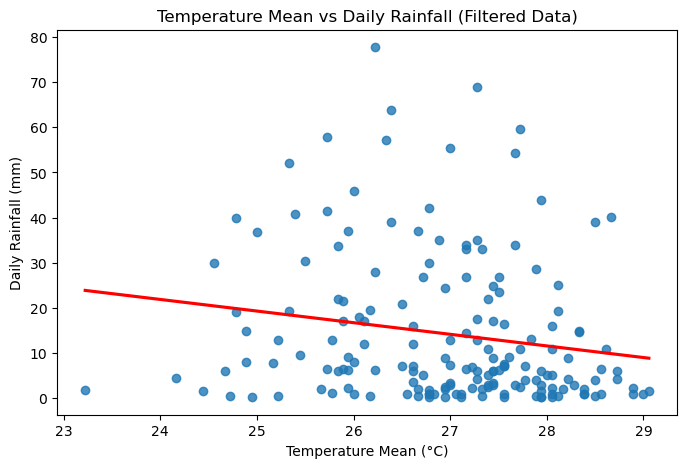

Pearson's Correlation Coefficient: -0.18
P-value: 0.021


In [33]:
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot with trend line
plt.figure(figsize=(8, 5))
sns.regplot(x='TEMP MEAN', y='DAILY RAINFALL', data=filtered_rainy_days_df, ci=None, line_kws={"color": "red"})
plt.title("Temperature Mean vs Daily Rainfall (Filtered Data)")
plt.xlabel("Temperature Mean (°C)")
plt.ylabel("Daily Rainfall (mm)")
plt.show()

# Calculate Pearson's correlation coefficient
pearson_corr, p_value = pearsonr(filtered_rainy_days_df['TEMP MEAN'], filtered_rainy_days_df['DAILY RAINFALL'])
print(f"Pearson's Correlation Coefficient: {pearson_corr:.2f}")
print(f"P-value: {p_value:.3f}")


### Questions
1. What is Pearson’s correlation coefficient between TEMP MEAN and Daily Rainfall? Is it positive, negative, or close to zero?
2. Based on the correlation coefficient and the trend line, do you observe a meaningful relationship between temperature and rainfall for moderate rainy days?
3. How does the trend line help in visualizing the relationship, or lack thereof, between temperature and rainfall?

## Answer:
1. The Pearson's Correlation Coefficient shows a value at -0.18, with a P-value of around 0.021. This means that a there is a weak negative correlation between the mean temperature and daily rainfall, with the P-value basically reinforcing the robustness of the Pearson Correlation result. 
2. Looking at the graph, we can see a downward trend, basically saying that there is a weak correlation between the two variables. Meaning, rainfall amount doesnt necessarily mean a cooler or warmer temperature.
3. The graph helps to intuitively see the relationship of the two variables. The graph shows where each data point can be found, and the trend line helps by showing whether there is an increasing or decreasing trend between the two variables. In this case, there is a weak relationship between the two.

---
## Task 8: Exploring Seasonal Patterns
Group the `Daily Rainfall` data by month to observe seasonal patterns. Calculate the mean rainfall for each month and plot it to see how rainfall changes over the year.

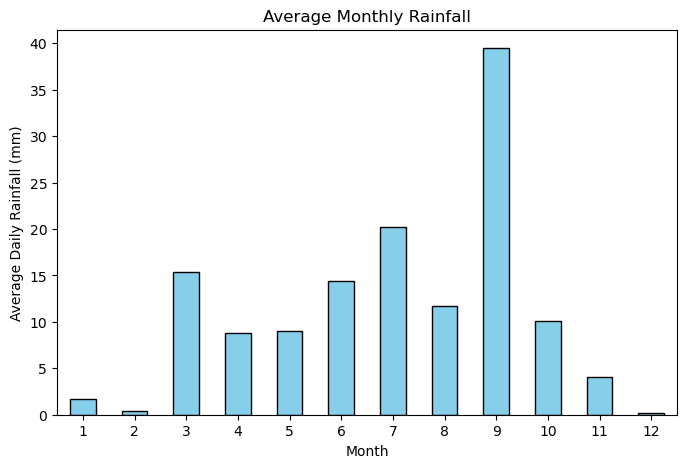

In [34]:
# Convert 'DATE' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')  # 'errors=coerce' handles any invalid dates by setting them to NaT

# Add a 'Month' column based on the DATE
df['Month'] = df['DATE'].dt.month

# Calculate mean monthly rainfall
monthly_rainfall = df.groupby('Month')['DAILY RAINFALL'].mean()

# Plot mean monthly rainfall
plt.figure(figsize=(8, 5))
monthly_rainfall.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Monthly Rainfall")
plt.xlabel("Month")
plt.ylabel("Average Daily Rainfall (mm)")
plt.xticks(rotation=0)
plt.show()


### Questions
1. Which month(s) have the highest average rainfall? What might be causing this seasonal pattern?
2. How does the seasonal variation in rainfall align with your expectations for the region?

## Answer:
1. The month with the highest rainfall amount is September, with about 40mm average daily rainfall. According to news, this was the month when Typhoon Ondoy hit the Philippines, causing the average rainfall to spike. Next are the months of March and July with about 15mm and 20mm avg. daily rainfall respectively. Between these months we can see large amounts of daily rainfall as compared to the months of NDJF. I suspect because of of the cool and dry wind of the northeastern monsoon.
2.  This usually aligns with the Modified Coronas Classification of Climate type 1, where it is usually dry from November to April and wet during the rest of the year.